In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit
from scipy.stats import linregress
plt.style.use('fast')

In [42]:
def diffPercentage(measured, teo):
    return 100*(1 - measured/teo)

In [43]:
low_passDataIV = pd.read_excel('L3.xlsx', sheet_name = '1_sin')
low_passDataTau = pd.read_excel('L3.xlsx', sheet_name = '1_prost')
low_passDataTau

,t [us],V [mV]
0,0,0.000
1,34,16.875
2,52,24.375
3,100,42.000
4,148,58.125
5,208,76.875
6,260,90.750
7,328,106.875
8,412,122.250
9,528,139.500


In [44]:
inputVoltage = low_passDataIV['Amp1 [mV]']
outputVoltage = low_passDataIV['Amp2 [mV]']
frequency = low_passDataIV['f']/1000 # kHz

In [45]:
amplification = 20*np.log10(outputVoltage/inputVoltage) # [1] -> dB

In [46]:
def low_passModel(measurements,  cutoffFrequency):
    return 1/(np.sqrt(1 + (measurements/cutoffFrequency)**2))

In [47]:
popt, pcov = curve_fit(low_passModel, xdata = frequency, ydata = outputVoltage/inputVoltage, p0=0.5)
popt, np.sqrt(pcov)

(array([0.41392147]), array([[0.007368]]))

In [48]:
R4 = 200*10**3
C1 = 2.2*10**-9
cutoffTeo = 1/(2*np.pi*R4*C1)
cutoffTeo = cutoffTeo/1000 #kHz
cutoffTeo, popt[0]

(0.3617157797543076, 0.41392147374599536)

In [49]:
slope_x_data = np.log10(frequency[4:])
slope_y_data = amplification[4:]
linFit = linregress(slope_x_data, slope_y_data)
linFit

LinregressResult(slope=-17.44714327342536, intercept=-8.096436797828524, rvalue=-0.9992997154428073, pvalue=2.4915939475251668e-08, stderr=0.29215934909049024, intercept_stderr=0.2659028290512852)

[]

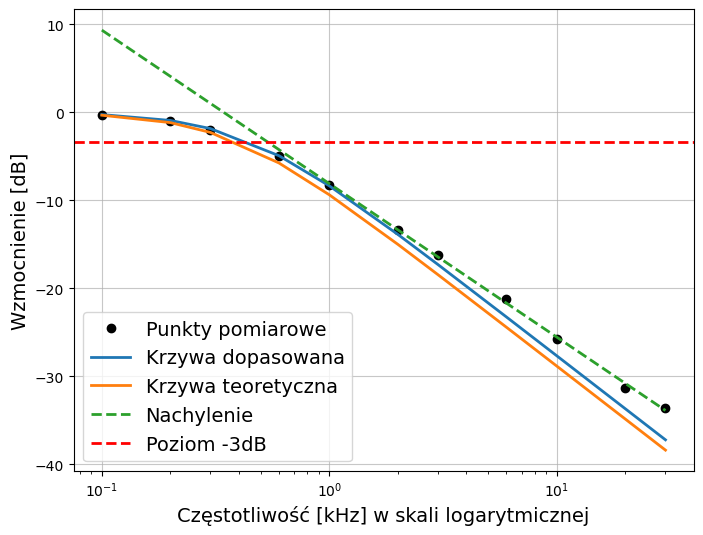

In [50]:
plt.figure(1, (8, 6))
plt.semilogx(frequency, amplification, marker = 'o', linestyle = '', color = 'black', label = 'Punkty pomiarowe')
plt.semilogx(frequency, 20*np.log10(low_passModel(frequency, popt)), linewidth = 2, label = 'Krzywa dopasowana')
plt.semilogx(frequency, 20*np.log10(low_passModel(frequency, cutoffTeo)), linewidth = 2, label = 'Krzywa teoretyczna')
plt.semilogx(frequency, linFit.slope*np.log10(frequency) + linFit.intercept, linewidth = 2, linestyle = '--', label = 'Nachylenie')
plt.axhline(y=np.max(amplification) - 3, color = 'red', linestyle = '--', linewidth = 2, label='Poziom -3dB')
plt.xlabel('Częstotliwość [kHz] w skali logarytmicznej', fontsize = 14)
plt.ylabel('Wzmocnienie [dB]', fontsize = 14)
plt.grid(alpha = 0.7)
plt.legend(fontsize = 14)
plt.plot()

In [51]:
time = low_passDataTau['t [us]']
voltage = low_passDataTau['V [mV]']

In [53]:
def low_passResponse(t, U_max, tau):
    return U_max*(1 - np.exp(-t/tau))

In [54]:
popt, pcov = curve_fit(low_passResponse, xdata = time, ydata = voltage, p0=[180, 440])
popt, np.sqrt(pcov)
diffPercentage(popt[0], 200), diffPercentage(popt[1], 440)

(3.165460728937708, 6.612157192670399)

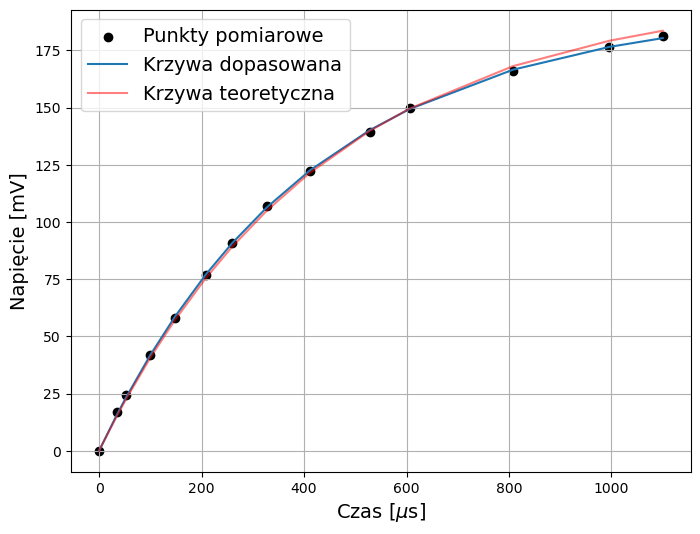

In [55]:
plt.figure(1, (8, 6))
plt.scatter(time, voltage, c = 'black', label = 'Punkty pomiarowe')
plt.plot(time, low_passResponse(time, popt[0], popt[1]), label = 'Krzywa dopasowana')
plt.plot(time, low_passResponse(time, 200, 440), label = 'Krzywa teoretyczna', color = 'red', alpha = 0.5)
plt.xlabel(r'Czas [$\mu$s]', fontsize = 14)
plt.ylabel('Napięcie [mV]', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

In [56]:
data = pd.read_excel('A2A4.xlsx', sheet_name = '2a)')
czas = data['t [us]']
napiecie = data['U [mV]']
data

,f [kHz],U_out [mV],U_in [mV],K_linear,K [dB],teoretyczne K [dB],Unnamed: 6,t [us],U [mV]
0,0.1,0.24,213,0.001127,-58.963367,-64.608980,NaN,0.4,-33.250
1,0.2,0.48,213,0.002254,-52.942767,-58.588385,NaN,0.8,-58.900
2,0.3,0.81,213,0.003803,-48.397892,-55.066567,NaN,1.2,-76.725
3,0.6,1.02,213,0.004789,-46.395589,-49.046008,NaN,1.6,-89.775
4,1.0,3.87,213,0.018169,-34.813373,-44.609129,NaN,2.0,-99.750
5,2.0,8.60,213,0.040376,-27.877623,-38.588980,NaN,2.4,-106.875
6,3.0,10.20,213,0.047887,-26.395589,-35.067906,NaN,2.8,-111.875
7,6.0,14.80,213,0.069484,-23.162358,-29.051360,NaN,3.2,-115.900
8,10.0,18.80,209,0.089952,-20.919769,-24.623980,NaN,3.6,-118.525
9,20.0,28.00,209,0.133971,-17.459765,-18.648076,NaN,4.0,-120.650


In [57]:
def high_passResponse(t, U, tau):
    return -U*np.exp(-t/tau)

popt, pcov = curve_fit(high_passResponse, xdata = czas, ydata = napiecie, p0=[200, 440])
popt

array([1.09042501e+02, 5.19903232e+08])

In [58]:
high_passIV = pd.read_excel('L3.xlsx', sheet_name = '2_sin')
high_passTau = pd.read_excel('L3.xlsx', sheet_name = '2_prost')

inputVoltage = high_passIV['Amp1 [mV]']
outputVoltage = high_passIV['Amp2 [mV]']
frequency = high_passIV['f']/1000 #kHz


In [59]:
amplification = outputVoltage/inputVoltage
amplificationDB = 20*np.log10(outputVoltage/inputVoltage)

In [73]:
slope_x_data = np.log10(frequency[:7])
slope_y_data = amplificationDB[:7]
linFit = linregress(slope_x_data, slope_y_data)
linFit

LinregressResult(slope=17.08198053651137, intercept=4.664512342782352, rvalue=0.9988900925897927, pvalue=7.877935848037381e-08, stderr=0.36022458364896653, intercept_stderr=0.48060984375155125)

In [74]:
def high_passModel(measured, cutoff):
    return 1/np.sqrt(1 + (cutoff/measured)**2)

In [75]:
popt, pcov = curve_fit(high_passModel, xdata=frequency, ydata=amplification, p0=0.5)
popt, np.sqrt(pcov), diffPercentage(popt, cutoffTeo)

(array([0.41369115]), array([[0.01229078]]), array([-14.36911818]))

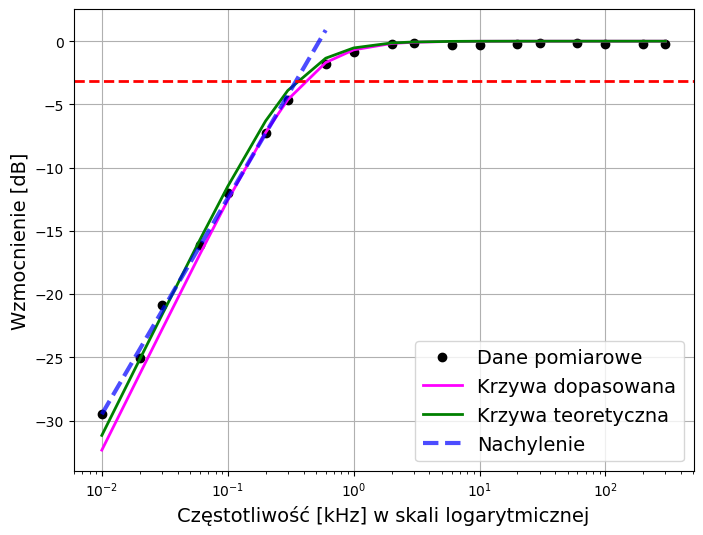

In [85]:
plt.figure(1, (8, 6))
plt.semilogx(frequency, amplificationDB, marker = 'o', linestyle = '', label = 'Dane pomiarowe', color = 'black')
plt.semilogx(frequency, 20*np.log10(high_passModel(frequency, popt)), color = 'magenta', label = 'Krzywa dopasowana', linewidth = 2)
plt.semilogx(frequency, 20*np.log10(high_passModel(frequency, cutoffTeo)), color = 'green', label = 'Krzywa teoretyczna', linewidth = 2)
plt.semilogx(frequency[:8], linFit.slope*np.log10(frequency[:8]) + linFit.intercept, linewidth = 3, linestyle = '--', label = 'Nachylenie', color = '#0000FF', alpha = 0.7)
plt.axhline(y = np.max(amplificationDB) - 3, color = 'red', linewidth = 2, linestyle = '--')
plt.xlabel('Częstotliwość [kHz] w skali logarytmicznej', fontsize = 14)
plt.ylabel('Wzmocnienie [dB]', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

In [63]:
time = high_passTau['t [us]']
voltage = high_passTau['V [mV]']

In [64]:
def high_passResponse(t, U, tau):
    return U*np.exp(-t/tau)

popt, pcov = curve_fit(high_passResponse, xdata = time, ydata = voltage, p0=[200, 440])
popt, np.sqrt(pcov)

C:\Users\szcis\AppData\Local\Temp\ipykernel_8020\2519974332.py:5: RuntimeWarning: invalid value encountered in sqrt
  popt, np.sqrt(pcov)


(array([197.28352973, 396.74136227]),
 array([[1.08690791,        nan],
        [       nan, 4.11431586]]))

In [65]:
diffPercentage(popt[0], 200), diffPercentage(popt[1], 440)

(1.358235134387309, 9.831508575201386)

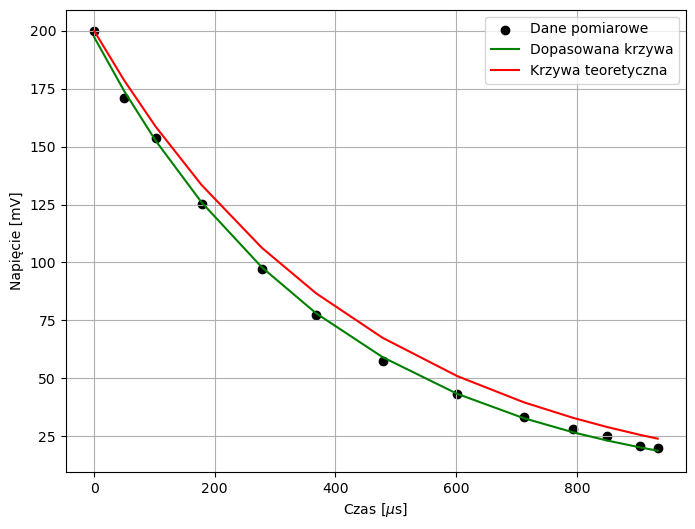

In [66]:
plt.figure(1, (8, 6))
plt.scatter(time, voltage, marker = 'o', c='black', label = 'Dane pomiarowe')
plt.plot(time, high_passResponse(time, popt[0], popt[1]), c = 'green', label = 'Dopasowana krzywa')
plt.plot(time, high_passResponse(time, 200, 440), c = 'red', label = 'Krzywa teoretyczna')
plt.xlabel(r'Czas [$\mu$s]')
plt.ylabel('Napięcie [mV]')
plt.legend()
plt.grid()